# 1.Загрузка данных

## 1.1 Установка ключа и скачивание данных 

In [1]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('mlg-ulb/creditcardfraud/code', path='E:\MIPT\ML и NN\Homeworks\HW_2', unzip=True)

## 1.2 Библиотеки

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Metrics
from sklearn.metrics import classification_report

# Models
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Sampling
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek

#Pipline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#Parallel processes
from dask.distributed import Client
from joblib import dump, load
import joblib



## 1.3 Загрузка датасета в pandas dataframe

In [3]:
init_data = pd.read_csv('creditcard.csv')

# 2.Первичная проверка данных

In [4]:
init_data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
init_data.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
init_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
init_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data = init_data.copy(deep = True)

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data.duplicated().sum()

1081

In [11]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [12]:
data = pd.concat(
    [data.drop(columns = ['Class']).astype(np.float32),
     data['Class'].astype(np.float32)], 
     axis=1,
     copy=True
     )

In [13]:
indx = list(map(lambda x: x.lower(), list(init_data.columns)))
data.columns = indx
data.rename(columns={'class': 'target'}, inplace=True)
data.shape

(283726, 31)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    283726 non-null  float32
 1   v1      283726 non-null  float32
 2   v2      283726 non-null  float32
 3   v3      283726 non-null  float32
 4   v4      283726 non-null  float32
 5   v5      283726 non-null  float32
 6   v6      283726 non-null  float32
 7   v7      283726 non-null  float32
 8   v8      283726 non-null  float32
 9   v9      283726 non-null  float32
 10  v10     283726 non-null  float32
 11  v11     283726 non-null  float32
 12  v12     283726 non-null  float32
 13  v13     283726 non-null  float32
 14  v14     283726 non-null  float32
 15  v15     283726 non-null  float32
 16  v16     283726 non-null  float32
 17  v17     283726 non-null  float32
 18  v18     283726 non-null  float32
 19  v19     283726 non-null  float32
 20  v20     283726 non-null  float32
 21  v21     28

 # 3.Основное исследование

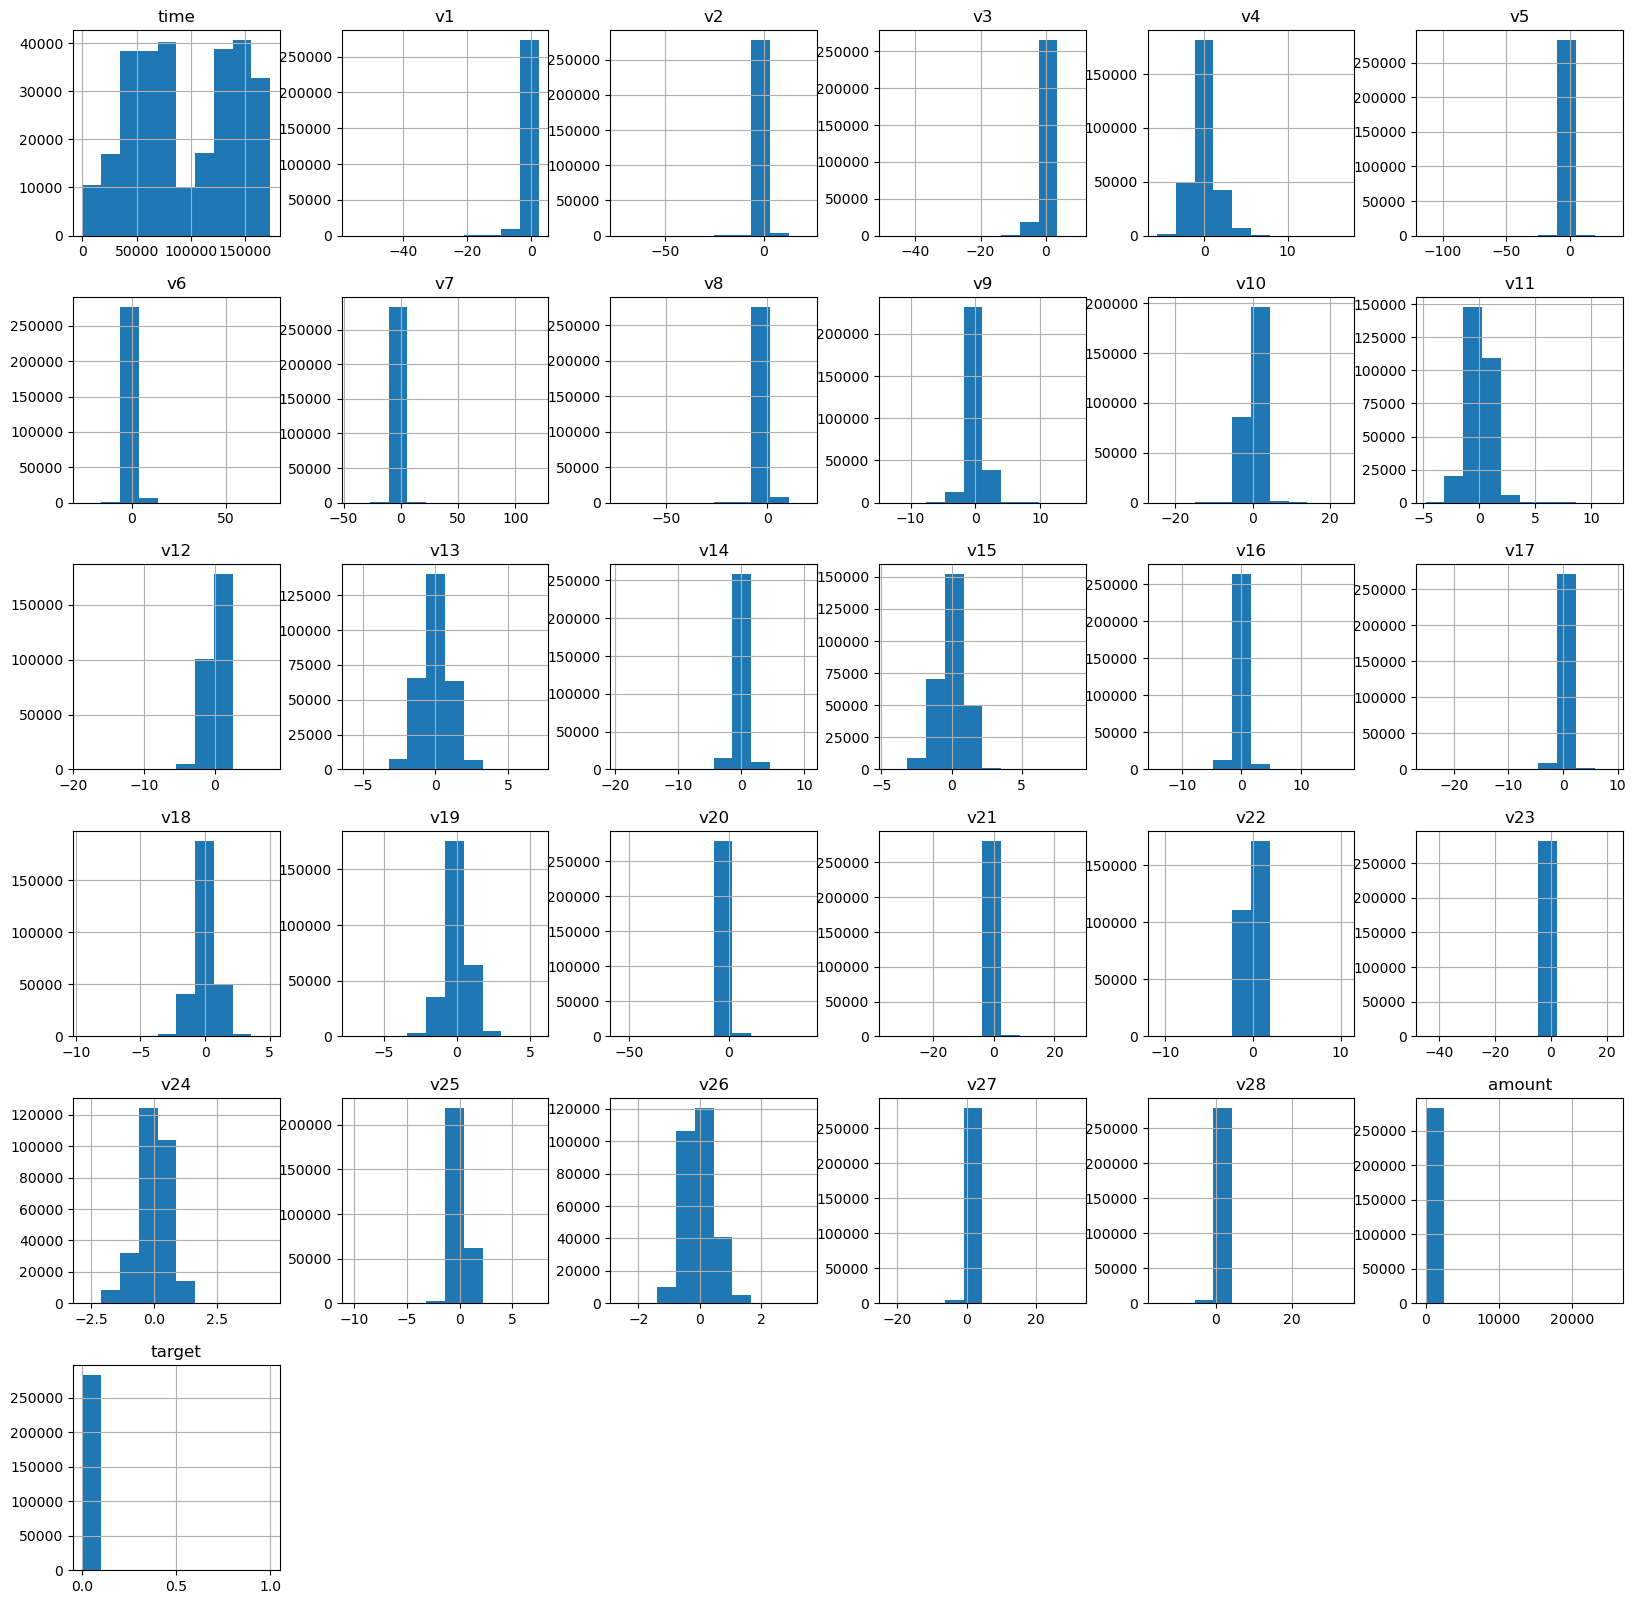

In [15]:
data.hist(figsize=(20, 20))
pass

Text(0.5, 1.0, 'target')

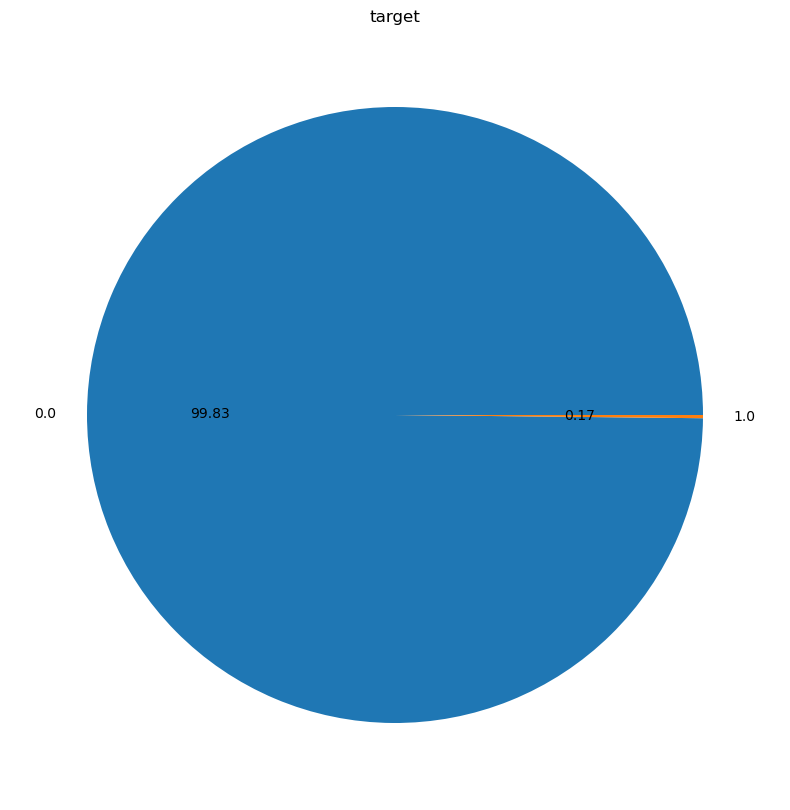

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(data['target'].value_counts(), autopct='%.2f', labels=data['target'].value_counts().index)
ax.set_title('target')

<Axes: >

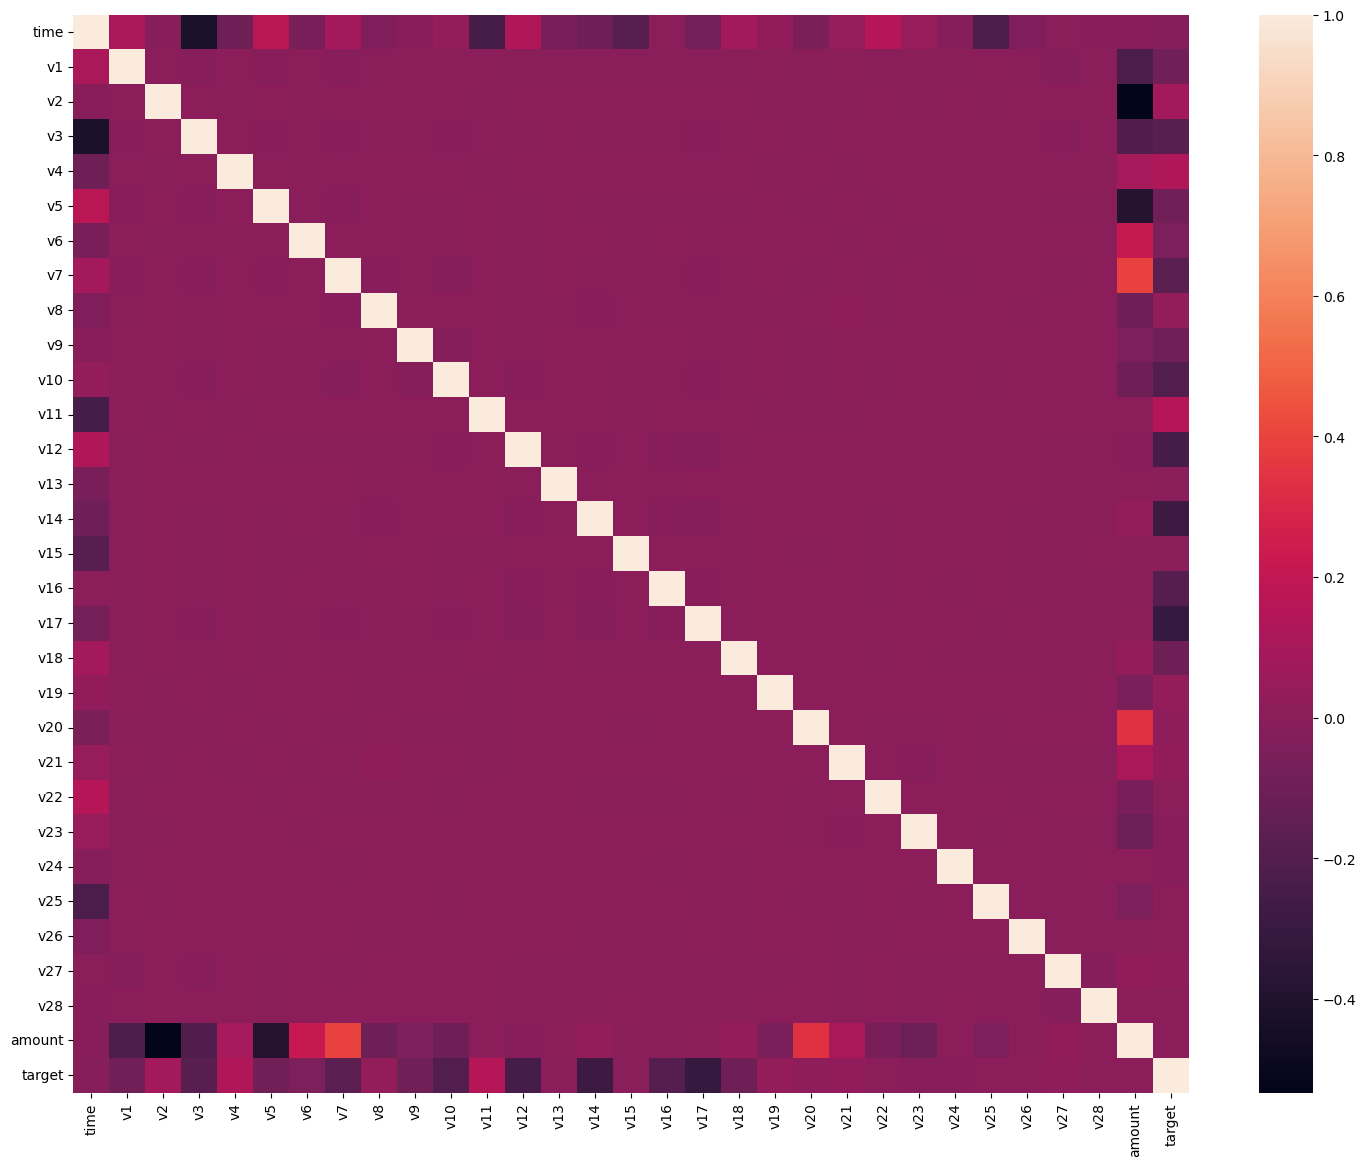

In [17]:
plt.figure(figsize=(18,14))
sns.heatmap(data.corr(),annot=False)

## 3.1 Функции для предобработки

In [18]:
def remove_outliers_from_data(dataframe: pd.DataFrame, k=3.0) -> pd.DataFrame: 
  """
  Эта функция выкинет из данных строки, в которых содержатся элементы, 
  выходящие за границу отрезка: [median - k*std; median + k*std]

  :param k: interval boundaries, defaults to 3
  :type k: float

  :param dataframe: init data
  :type dataframe: pandas.DataFrame

  :raises None

  :rtype: pandas.DataFrame, float

  :return: cleaned pandas.DataFrame, percent of dropped data
  """

  data1 = dataframe.copy(deep=True)
  indx = list(data1.drop(columns='target').columns)
  for cols in indx:
    s = data[cols].std()
    m = data[cols].median()
    down_bound = m - k * s
    up_bound = m + k * s
    data1 = data1[(data1[cols] < up_bound) & (data1[cols] > down_bound)]
  percent_of_rows = (dataframe.shape[0] - data1.shape[0]) / dataframe.shape[0] * 100
  dataframe_targets = dict(dataframe.target.value_counts())
  data1_targets = dict(data1.target.value_counts())
  '''print(dataframe_targets, data1_targets)
  if k == 0:
    percent_of_target = 100
  else:
    percent_of_target = (dataframe_targets[1] - data1_targets[1]) / dataframe_targets[1] * 100'''
  return data1, percent_of_rows, dataframe_targets, data1_targets

In [19]:
def drop_data_points(dataframe: pd.DataFrame, percent: float):
  """
    Эта функция "проредит" данные, уберёт те точки, у которых target = 0, 
    причём количество выбрасываемых строк не может больше максимального, того, 
    которое сделает несбалансрованным уже 1 класс

    :param percent: percent of dropped rows
    :type percent: float

    :param dataframe: init data
    :type dataframe: pandas.DataFrame

    :raises None

    :rtype: pandas.DataFrame

    :return: thinned dataframe
    """
  dataframe = dataframe.sample(frac=1)
  dct_value_counts = dict(dataframe['target'].value_counts())
  slc = int((percent / 100) * dataframe.shape[0])
  if slc > dataframe.shape[0] - dct_value_counts[1] * 2:
    print('Число отбрасываемых строк превышает максимально допустимое')
    slc = dataframe.shape[0] - dct_value_counts[1] * 2
  return dataframe.sort_values(by='target')[slc:]

In [20]:
data.target.value_counts()

0.0    283253
1.0       473
Name: target, dtype: int64

In [21]:
data1 = drop_data_points(data, 80)
data1.shape

(56746, 31)

In [22]:
data1.target.value_counts()

0.0    56273
1.0      473
Name: target, dtype: int64

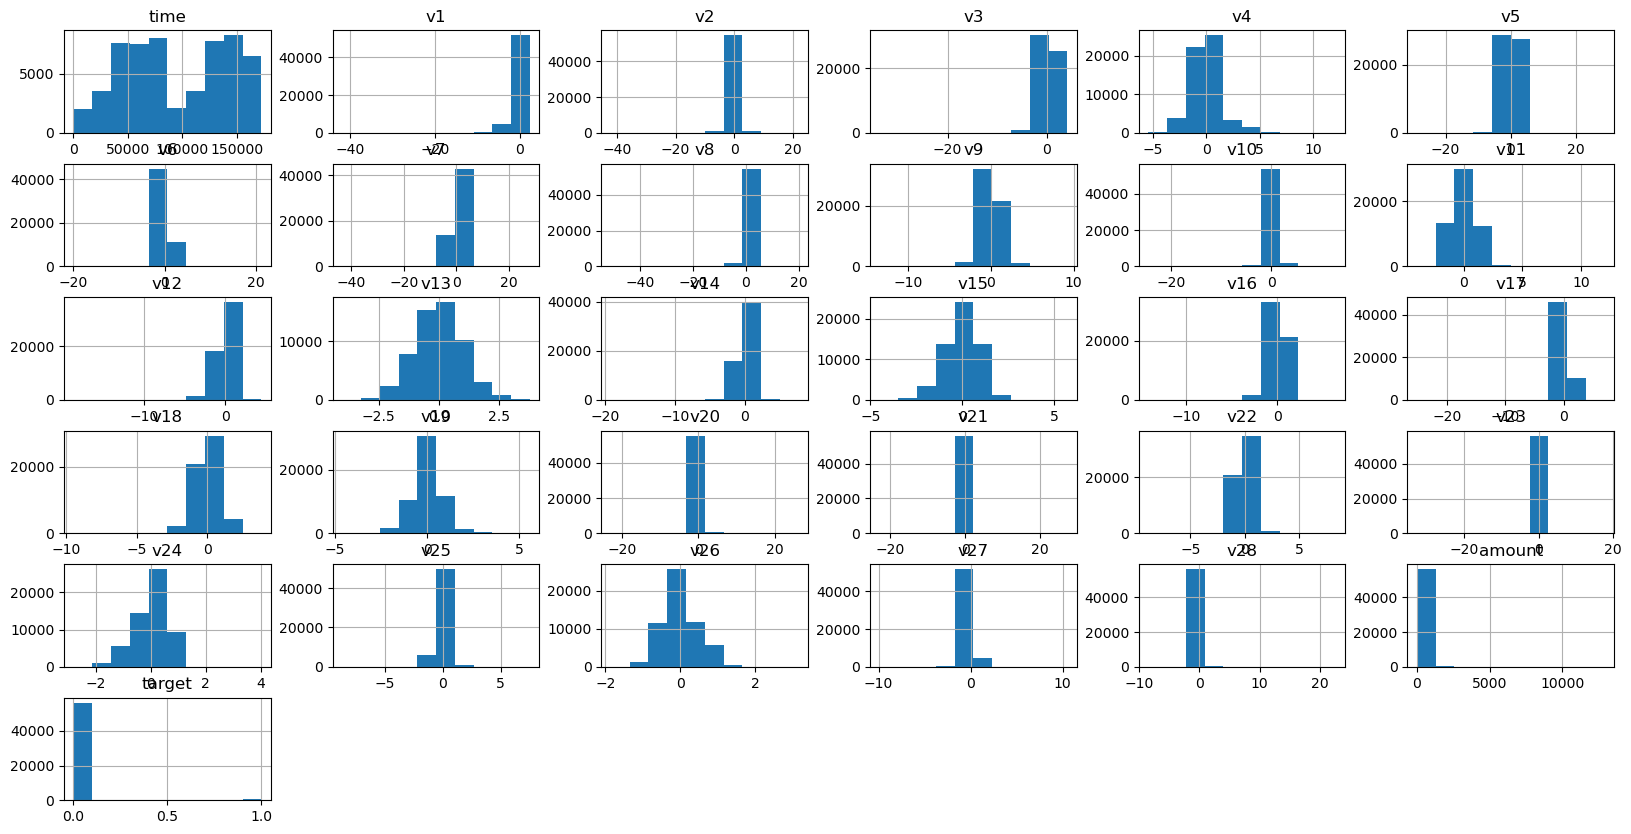

In [23]:
data1.hist(figsize=(20, 10))
pass

Число отбрасываемых строк превышает максимально допустимое


e:\MIPT\VS\Anaconda\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
C:\Users\shche\AppData\Local\Temp\ipykernel_3472\453686037.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(x = col,


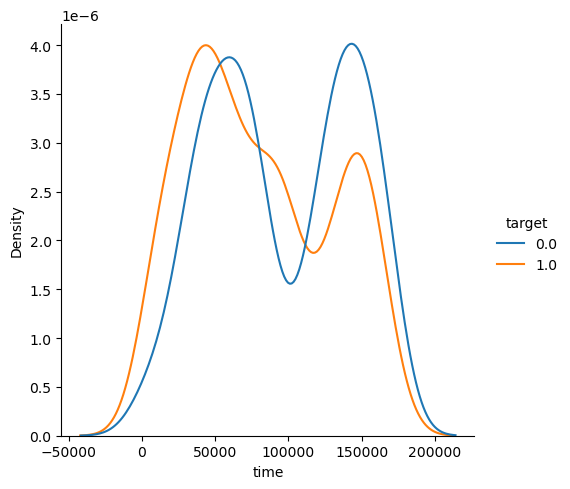

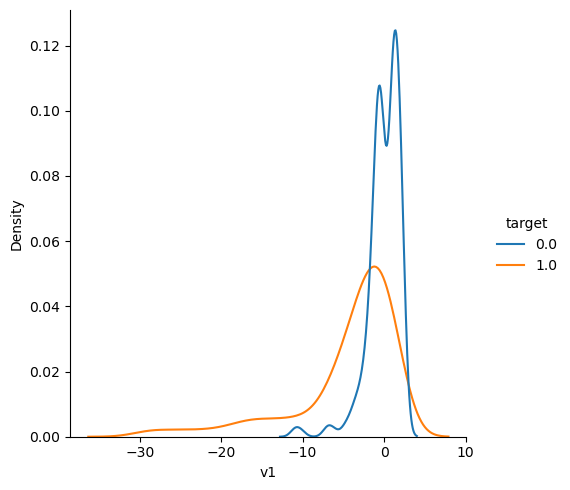

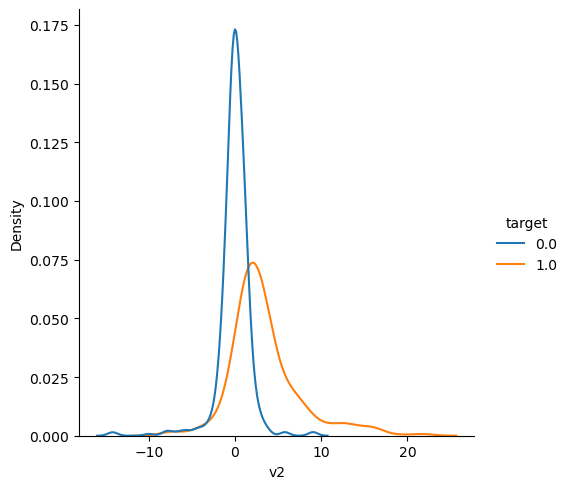

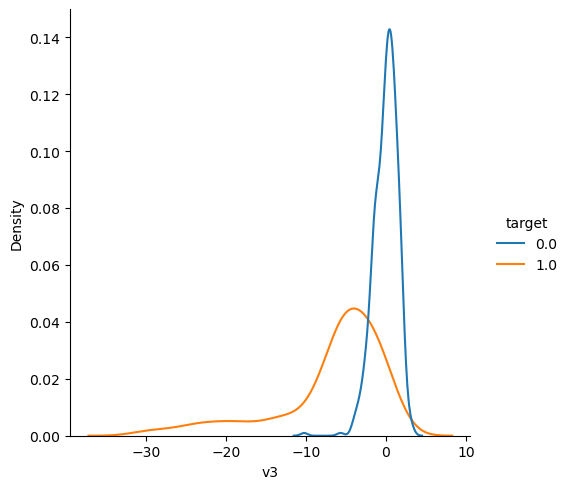

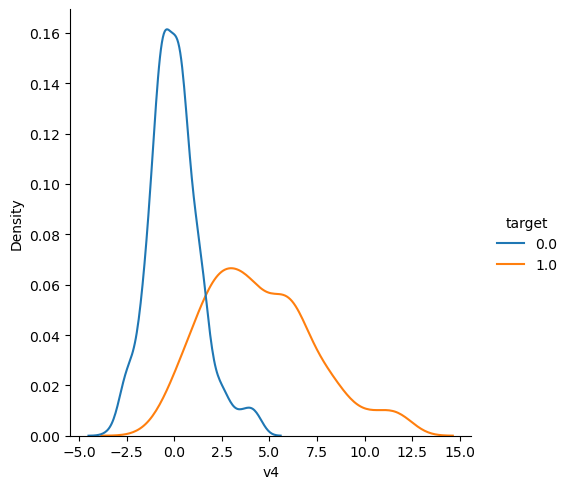

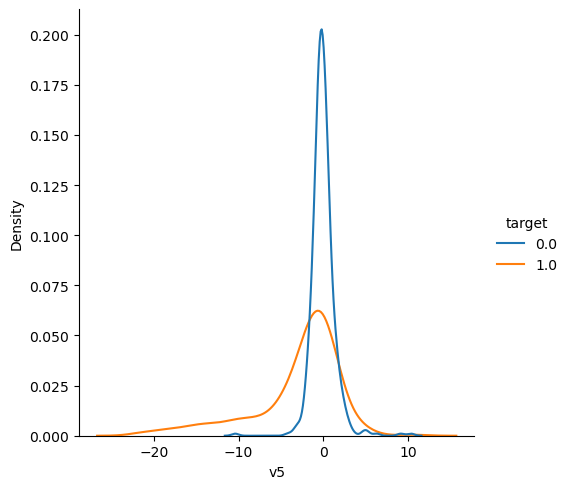

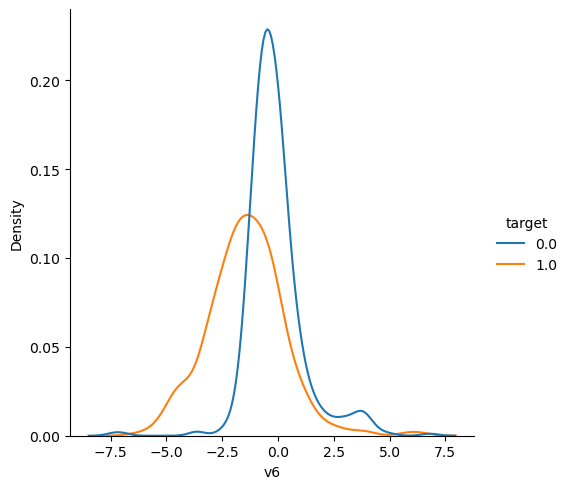

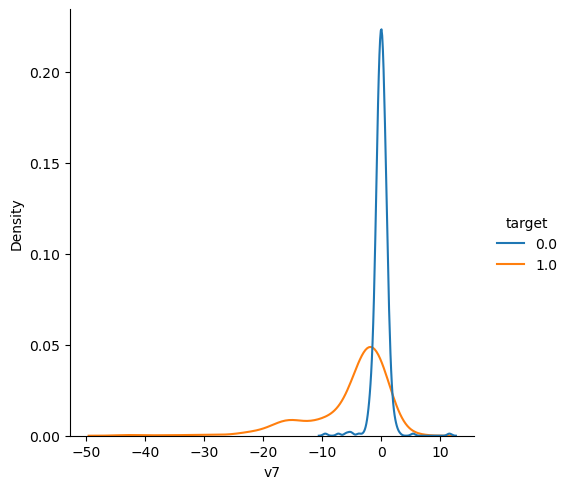

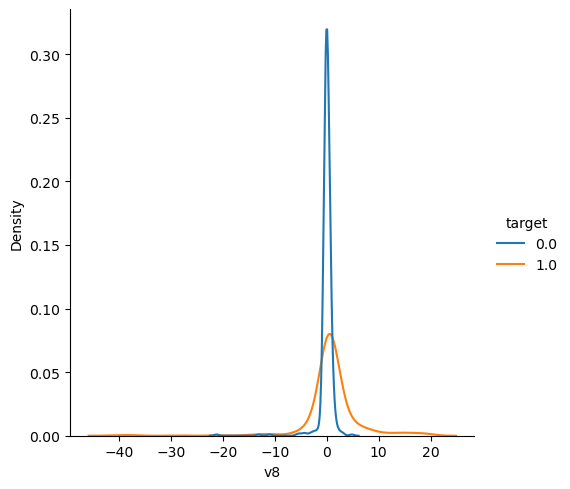

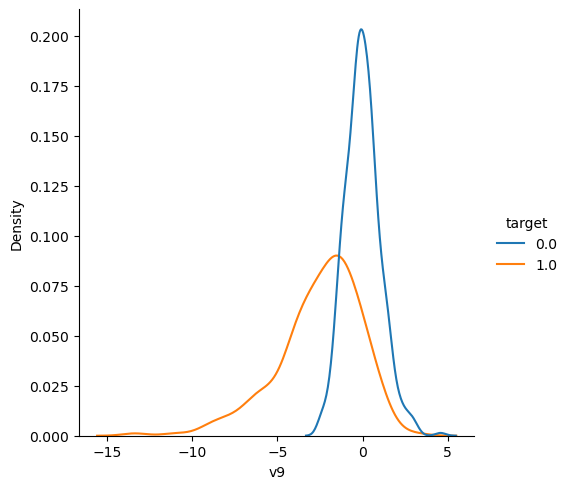

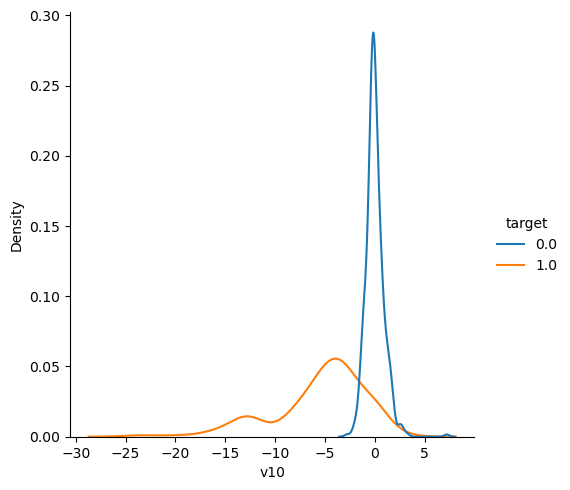

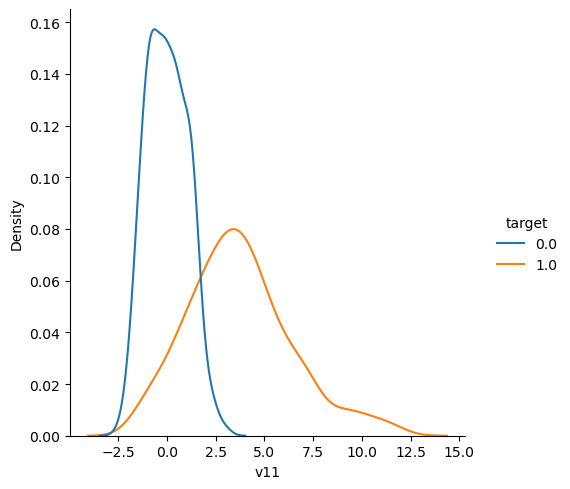

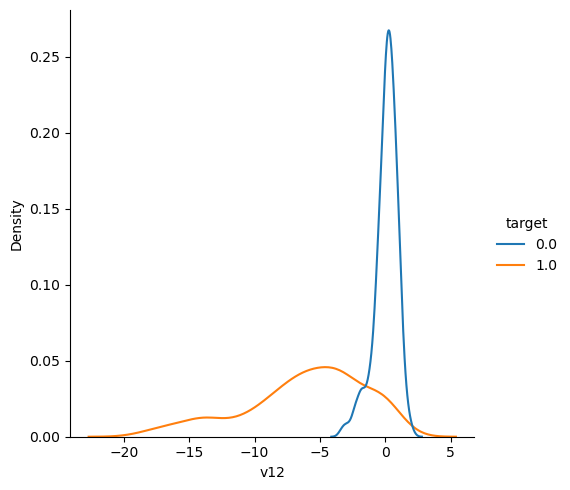

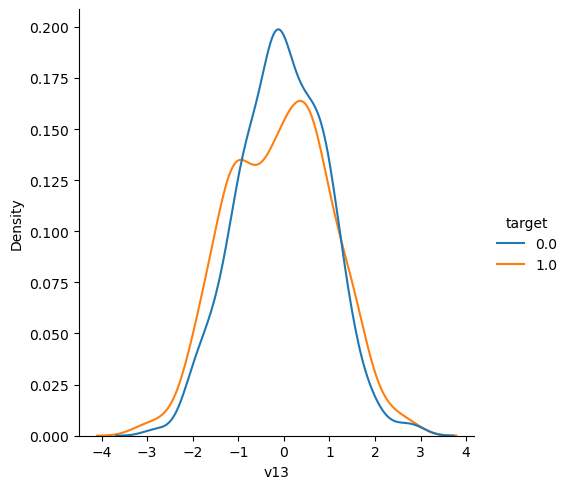

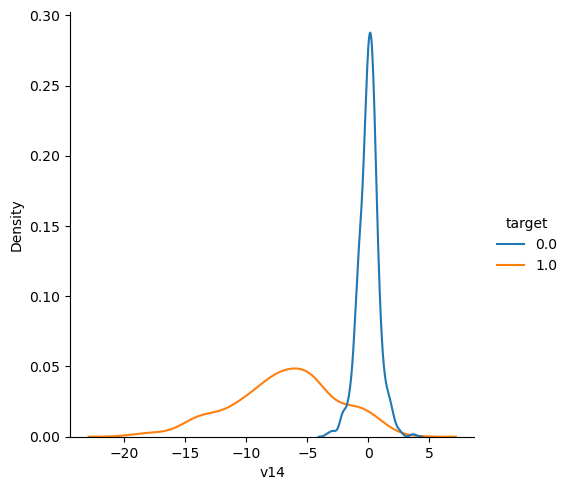

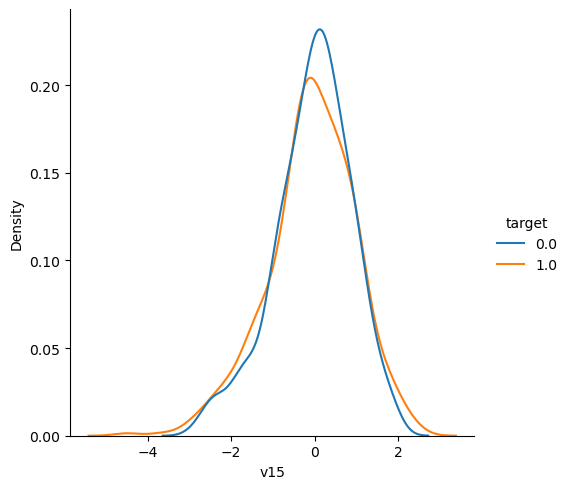

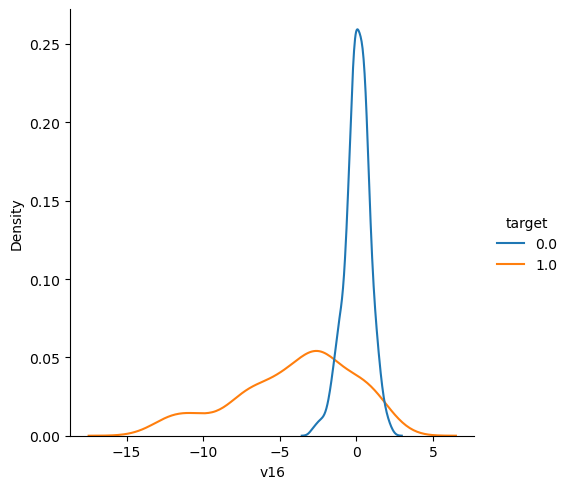

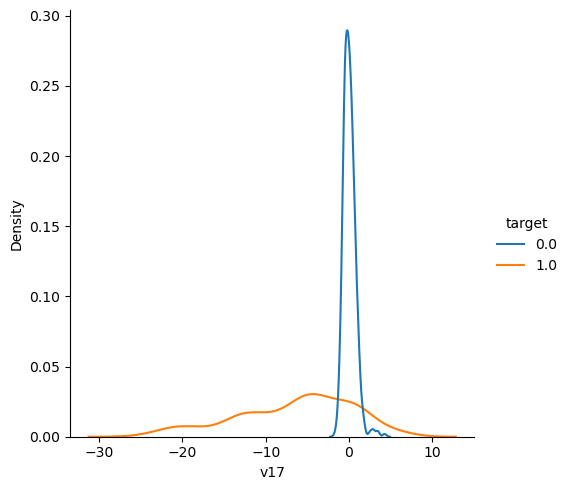

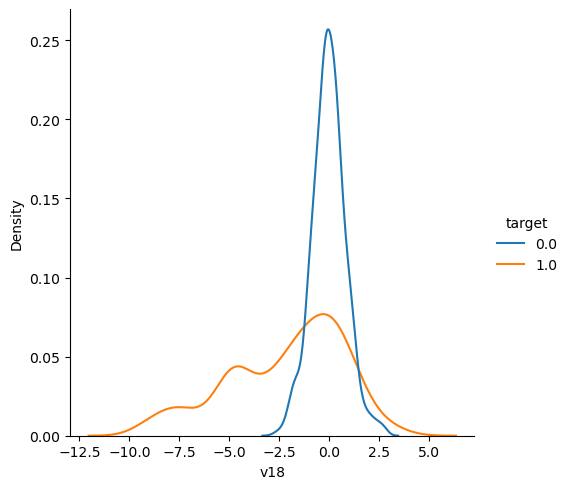

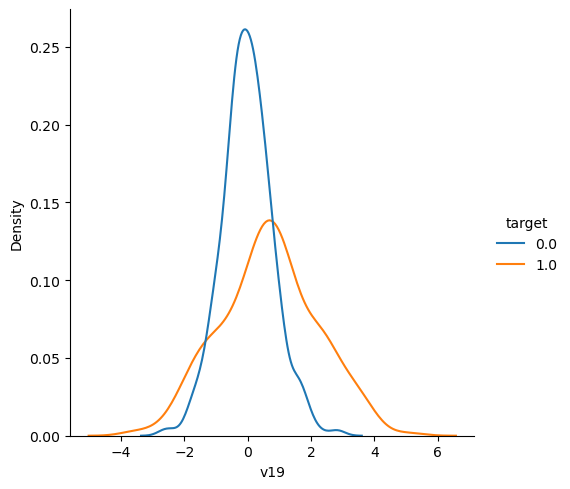

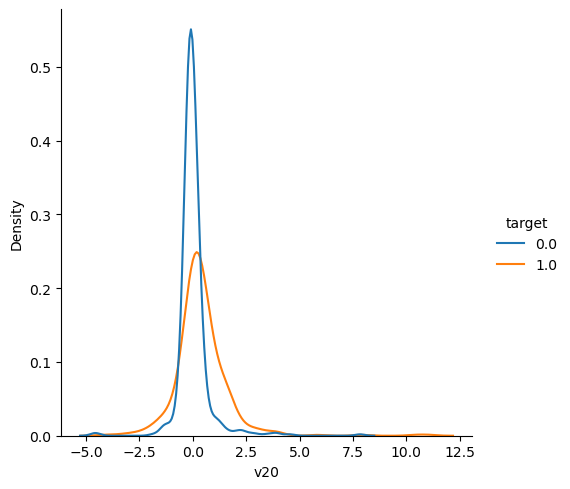

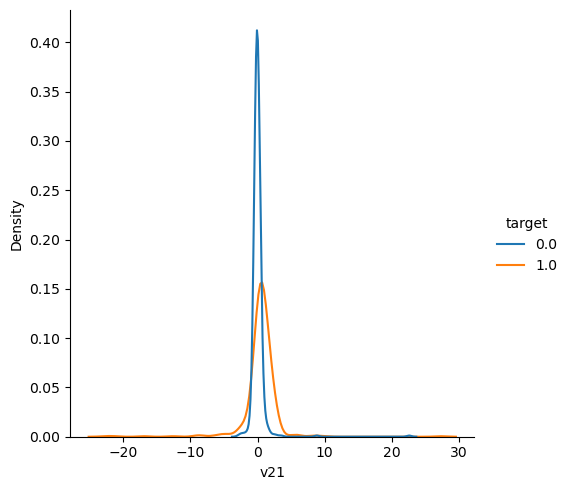

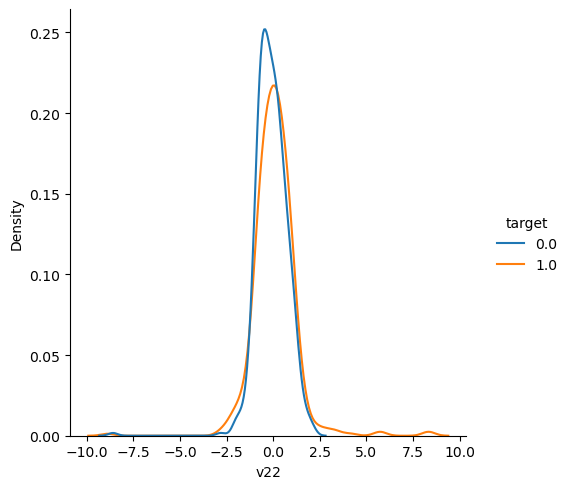

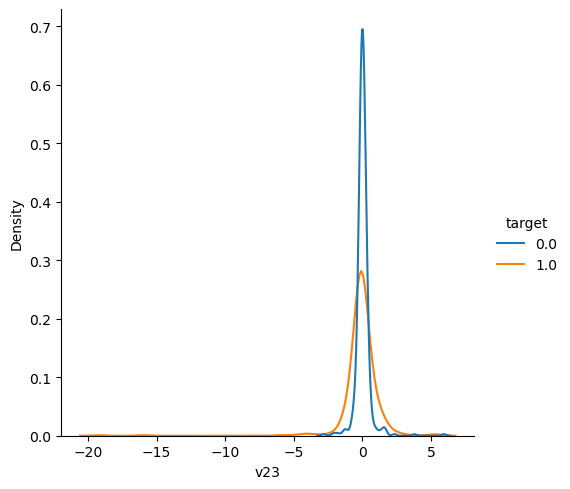

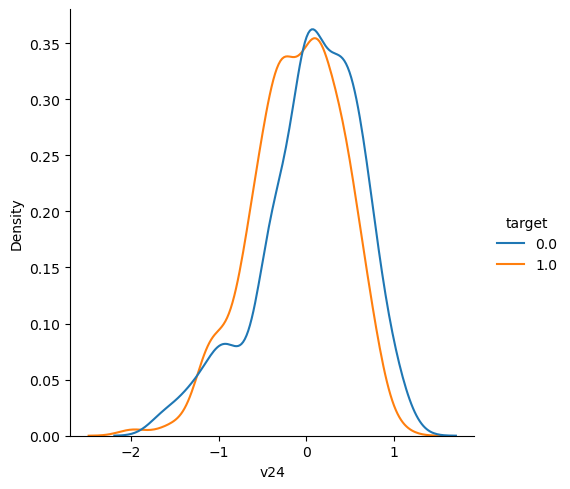

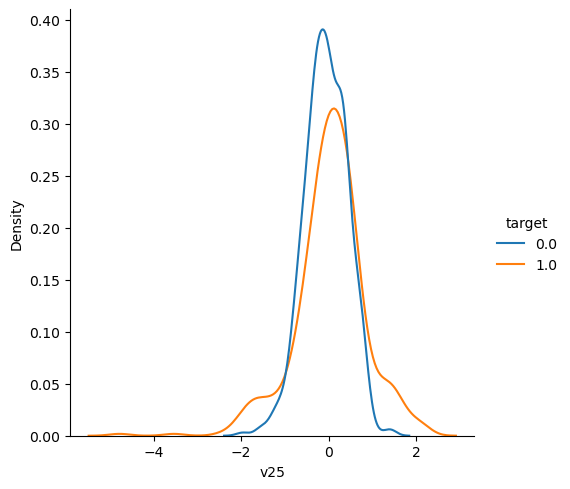

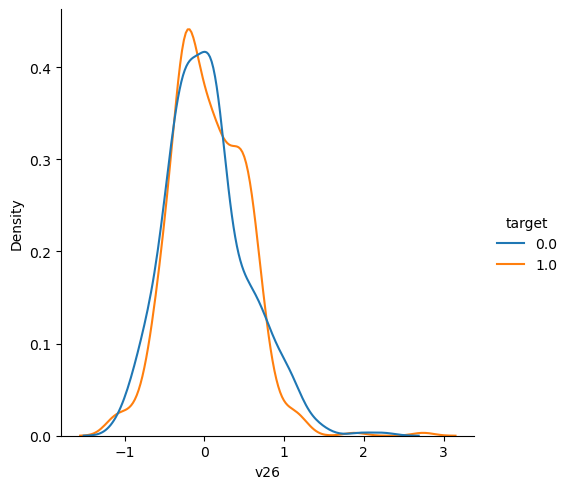

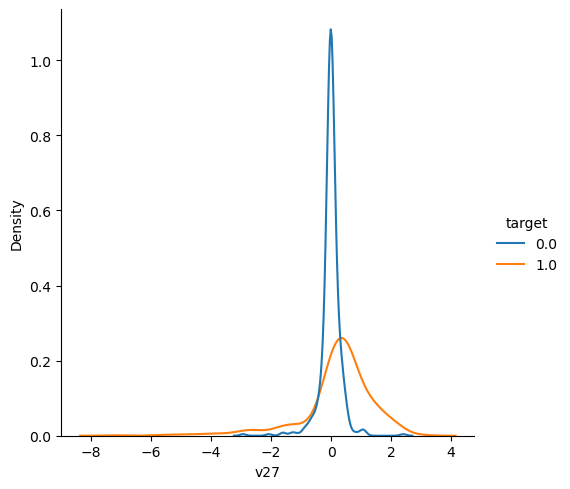

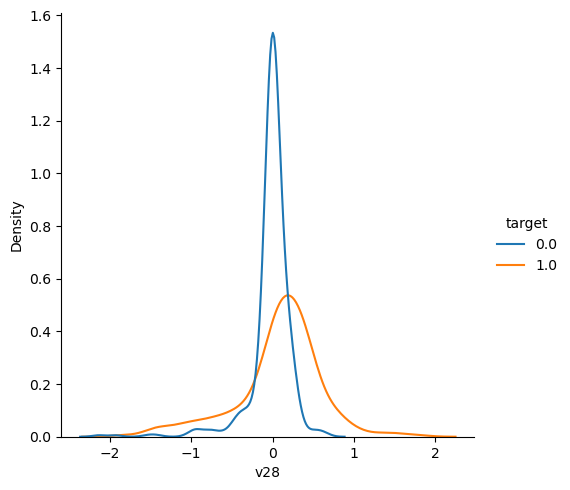

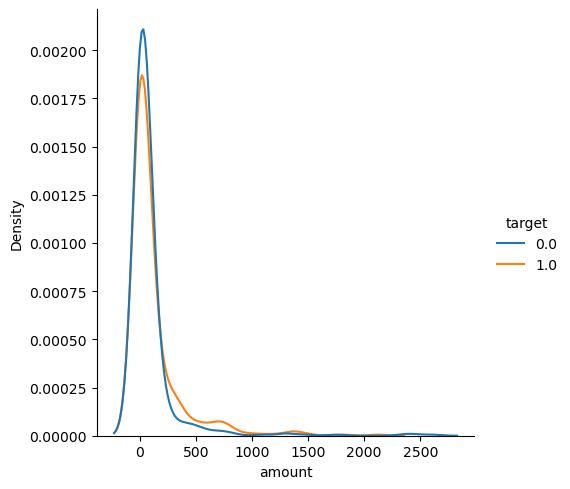

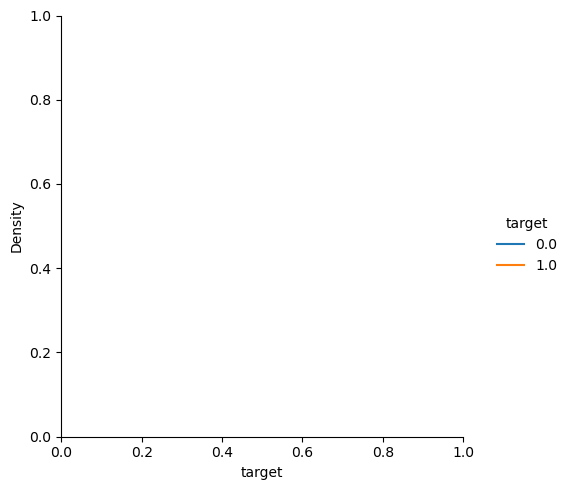

In [24]:
data1 = drop_data_points(data, 100)
for col in data1:
  sns.displot(x = col,
            hue = "target",
            kind = "kde",
            data = data1)
pass

In [25]:
data1.shape, data1.target.value_counts()

((946, 31),
 0.0    473
 1.0    473
 Name: target, dtype: int64)

## Вывод
1. Классы целевой переменной очень несбалансированны: 
99.83% - 0; 0.17% - 1.
2. В данных имеются значительные выборосы, выходящие за границы отрезка [mediana +- 5*std].
3. При фильтрации выбросов будет потеряна значительная часть Класса-1, т.к. плотность его распределения затрагивает выбросы.
4. Возможно, отбрасывание признаков [v5, v15, v22, v23, v25], улучшит метрики, необходимо провести эксперимент 

In [26]:
garbage_columns = ['v5', 'v15', 'v22', 'v23', 'v25']

# 4.Моделирование 

 Т.к. моделей и методов работы с несбалансированными классами существует много, не рационально будет перебирать все возможные их комбинации.
 
 План работы следующий:
 - на "сырых" данных протестируем  ранее изученные модели;
 - применим SMOTE, SMOTETomek и ADASYN к части train;
 - на аугментированных данных обучим модели, показавшие наилучшие результаты;
 - проведём эксперимент с отбрасыванием некоторых признаков;
 - проведём эксперимент с отбрасыванием части доминирующего класса.

In [82]:
results = list()

## 4.1 Pipline с моделями. Методы работы с несбалансированными классами не применяются


In [27]:
data.shape

(283726, 31)

In [28]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'), 
                                                    data['target'], 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=data['target'])

In [29]:
pipeline = Pipeline(
    [
     ('scaler', RobustScaler()),
     ('classifier', LogisticRegression())
     ]
    )

param_grid = [{'scaler': [
    'passthrough',
    RobustScaler(), 
    StandardScaler(), 
    MinMaxScaler()
    ],
               'classifier': [
                   LogisticRegression(), 
                   KNeighborsClassifier(), 
                   SVC(), 
                   DecisionTreeClassifier(), 
                   RandomForestClassifier(), 
                   CatBoostClassifier()
                   ]
               }
              ]

gs = GridSearchCV(
    pipeline,
    param_grid = param_grid,
    cv = 2,
    scoring = 'f1_macro'
)

In [30]:
ans = input('Обучить модель заново [y] - да; [n] - нет')
if ans == 'y':
    with joblib.parallel_backend('dask'):
        gs.fit(X_train, Y_train)
    dump(gs, 'grid_search_4_1.joblib')
elif ans == 'n':
    gs = load('grid_search_4_1.joblib')

In [31]:
gs.best_score_

0.9349800332790862

In [48]:
result = pd.DataFrame(gs.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_scaler,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,113.661450,17.009000,0.124667,5.960464e-07,LogisticRegression(),passthrough,"{'classifier': LogisticRegression(), 'scaler':...",0.851199,0.841137,0.846168,0.005031,21
1,129.450712,1.749322,0.125165,9.474277e-03,LogisticRegression(),RobustScaler(),"{'classifier': LogisticRegression(), 'scaler':...",0.853830,0.862337,0.858083,0.004254,15
2,113.659952,17.367540,0.145612,5.984068e-03,LogisticRegression(),StandardScaler(),"{'classifier': LogisticRegression(), 'scaler':...",0.853830,0.862337,0.858083,0.004254,15
3,129.029839,0.112699,0.124167,8.476615e-03,LogisticRegression(),MinMaxScaler(),"{'classifier': LogisticRegression(), 'scaler':...",0.801437,0.822023,0.811730,0.010293,22
4,0.085266,0.015465,120.052353,1.275089e+00,KNeighborsClassifier(),passthrough,"{'classifier': KNeighborsClassifier(), 'scaler...",0.504819,0.525233,0.515026,0.010207,23
5,0.247837,0.052360,124.425655,7.245617e-01,KNeighborsClassifier(),RobustScaler(),"{'classifier': KNeighborsClassifier(), 'scaler...",0.889718,0.899258,0.894488,0.004770,12
6,0.207445,0.086768,121.383293,7.234647e+00,KNeighborsClassifier(),StandardScaler(),"{'classifier': KNeighborsClassifier(), 'scaler...",0.903259,0.906292,0.904775,0.001516,11
7,0.111700,0.005983,119.003659,1.089088e+00,KNeighborsClassifier(),MinMaxScaler(),"{'classifier': KNeighborsClassifier(), 'scaler...",0.912658,0.906389,0.909524,0.003135,9
8,5.176153,0.622336,10.903334,1.057670e+00,SVC(),passthrough,"{'classifier': SVC(), 'scaler': 'passthrough'}",0.499583,0.499583,0.499583,0.000000,24
9,72.705007,9.442245,48.107815,5.917670e+00,SVC(),RobustScaler(),"{'classifier': SVC(), 'scaler': RobustScaler()}",0.830901,0.894174,0.862537,0.031637,13


In [32]:
gs.best_estimator_.named_steps

{'scaler': MinMaxScaler(),
 'classifier': <catboost.core.CatBoostClassifier at 0x2a55ca51ea0>}

In [33]:
y_pred = gs.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.96      0.74      0.83        95

    accuracy                           1.00     56746
   macro avg       0.98      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



Вывод: по результатам исследования лучшими результатами обладают CatBoostClassifier и RandomForestClassifier. В дальнейших экспериментах будем использовать их.

## 4.2 Перебор гиперпараметров RandomForestClassifier() и CatBoostClassifier(). Методы работы с несбалансированными классами не применяются 

In [34]:
data.shape

(283726, 31)

In [35]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'), 
                                                    data['target'], 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=data['target'])


In [36]:
pipeline = Pipeline(
    [
     ('scaler', RobustScaler()),
     ('classifier', RandomForestClassifier())
     ]
    )

param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__class_weight': [None, 'balanced', 'balanced_subsample'],
        'classifier__n_estimators': [100, 300, 500, 1000],
        'classifier__max_depth': [3, 5, 8, 15],
        'classifier__max_features': ["log2", "sqrt", "auto"],
    },
    {
        'classifier': [CatBoostClassifier(random_state=42)],
#        'classifier__iterations': [10, 50, 100, 500, 1000],
#        'classifier__learning rate': [0.1, 0.01, 0.05],
#        'classifier__depth': [3, 5, 10, 15]
    },
]

gs = GridSearchCV(
    pipeline,
    param_grid = param_grid,
    cv = 2,
    scoring = 'f1_macro'
)

ans = input('Обучить модель заново [y] - да; [n] - нет')
if ans == 'y':
    with joblib.parallel_backend('dask'):
        gs.fit(X_train, Y_train)
    dump(gs, 'grid_search_4_2.joblib')
elif ans == 'n':
    gs = load('grid_search_4_2.joblib')


print(classification_report(y_test, gs.predict(x_test)))
gs.best_estimator_.named_steps

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.97      0.74      0.84        95

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



{'scaler': RobustScaler(),
 'classifier': RandomForestClassifier(max_depth=15, n_estimators=500, random_state=42)}

In [83]:
results.append({'model': 'RandomForestClassifier', 
                'imbalanced': None, 
                'data': 'all', 
                'f1_macro': 0.92, 
                'recall_1': 0.74, 
                'precision_1': 0.97})

In [37]:
pipeline = Pipeline(
    [
     ('scaler', RobustScaler()),
     ('classifier', CatBoostClassifier())
     ]
    )

gs = GridSearchCV(
    pipeline,
    param_grid=None,
    cv = 3,
    scoring = 'f1_macro'
)

ans = input('Обучить модель заново [y] - да; [n] - нет')
if ans == 'y':
    with joblib.parallel_backend('dask'):
        gs.fit(X_train, Y_train)
    dump(gs, 'grid_search_4_2_cat.joblib')
elif ans == 'n':
    gs = load('grid_search_4_2_cat.joblib')


print(classification_report(y_test, gs.predict(x_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.97      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [84]:
results.append({'model': 'CatBoostClassifier', 
                'imbalanced': None, 
                'data': 'all', 
                'f1_macro': 0.92, 
                'recall_1': 0.73, 
                'precision_1': 0.97})

## 4.3 Метод обработки несбалансированных классов - SMOTE

In [38]:
data.shape

(283726, 31)

In [39]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'), 
                                                    data['target'], 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=data['target'])

augm = SMOTE()
X_train_augm, Y_train_augm = augm.fit_resample(np.array(X_train), 
                                               np.array(Y_train))

In [40]:
pipeline = Pipeline(
    [
     ('scaler', StandardScaler()),
     ('classifier', RandomForestClassifier())
     ]
    )

param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__class_weight': ['balanced'],
        'classifier__n_estimators': [500],
        'classifier__max_depth': [15],
        'classifier__max_features': ['auto'],
    },
    {
        'classifier': [CatBoostClassifier(random_state=42)],
    },
]

gs = GridSearchCV(
    pipeline,
    param_grid = param_grid,
    cv = 4,
    scoring = 'f1_macro'
)


ans = input('Обучить модель заново [y] - да; [n] - нет')
if ans == 'y':
    with joblib.parallel_backend('dask'):
        gs.fit(X_train_augm, Y_train_augm)
    dump(gs, 'grid_search_4_3_smote.joblib')
elif ans == 'n':
    gs = load('grid_search_4_3_smote.joblib')



In [41]:
print(classification_report(y_test, gs.predict(x_test)))
gs.best_estimator_.named_steps

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.67      0.79      0.72        95

    accuracy                           1.00     56746
   macro avg       0.83      0.89      0.86     56746
weighted avg       1.00      1.00      1.00     56746



e:\MIPT\VS\Anaconda\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


{'scaler': StandardScaler(),
 'classifier': <catboost.core.CatBoostClassifier at 0x2a55db1c2b0>}

In [85]:
results.append({'model': 'CatBoostClassifier', 
                'imbalanced': 'SMOTE', 
                'data': 'all', 
                'f1_macro': 0.86, 
                'recall_1': 0.79, 
                'precision_1': 0.67})

## 4.4 Pipline с моделями. Методы обработки несбалансированных классов - ADASYN

In [42]:
data.shape

(283726, 31)

In [43]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'), 
                                                    data['target'], 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=data['target'])

augm = ADASYN()
X_train_augm, Y_train_augm = augm.fit_resample(np.array(X_train), 
                                               np.array(Y_train))

In [44]:
pipeline = Pipeline(
    [
     ('scaler', StandardScaler()),
     ('classifier', RandomForestClassifier())
     ]
    )

param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__class_weight': ['balanced'],
        'classifier__n_estimators': [500],
        'classifier__max_depth': [15],
        'classifier__max_features': ['auto'],
    },
    {
        'classifier': [CatBoostClassifier(random_state=42)],
    },
]

gs = GridSearchCV(
    pipeline,
    param_grid = param_grid,
    cv = 4,
    scoring = 'f1_macro'
)


ans = input('Обучить модель заново [y] - да; [n] - нет')
if ans == 'y':
    with joblib.parallel_backend('dask'):
        gs.fit(X_train_augm, Y_train_augm)
    dump(gs, 'grid_search_4_4_adasyn.joblib')
elif ans == 'n':
    gs = load('grid_search_4_4_adasyn.joblib')

In [45]:
gs.best_score_, gs.best_estimator_.named_steps

(0.9956597142345118,
 {'scaler': StandardScaler(),
  'classifier': <catboost.core.CatBoostClassifier at 0x2a55db1c0d0>})

In [46]:
y_pred = gs.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.71      0.81      0.76        95

    accuracy                           1.00     56746
   macro avg       0.86      0.90      0.88     56746
weighted avg       1.00      1.00      1.00     56746



e:\MIPT\VS\Anaconda\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [86]:
results.append({'model': 'CatBoostClassifier', 
                'imbalanced': 'ADASYN', 
                'data': 'all', 
                'f1_macro': 0.88, 
                'recall_1': 0.81, 
                'precision_1': 0.71})

## 4.5 Pipline с моделями. Методы обработки несбалансированных классов - SMOTETomek

In [47]:
data.shape

(283726, 31)

In [48]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'), 
                                                    data['target'], 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=data['target'])

augm = SMOTETomek()
X_train_augm, Y_train_augm = augm.fit_resample(np.array(X_train), 
                                               np.array(Y_train))

In [49]:
pipeline = Pipeline(
    [
     ('scaler', StandardScaler()),
     ('classifier', RandomForestClassifier())
     ]
    )

param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__class_weight': ['balanced'],
        'classifier__n_estimators': [500],
        'classifier__max_depth': [15],
        'classifier__max_features': ['auto'],
    },
    {
        'classifier': [CatBoostClassifier(random_state=42)],
    },
]

gs = GridSearchCV(
    pipeline,
    param_grid = param_grid,
    cv = 4,
    scoring = 'f1_macro'
)


ans = input('Обучить модель заново [y] - да; [n] - нет')
if ans == 'y':
    with joblib.parallel_backend('dask'):
        gs.fit(X_train_augm, Y_train_augm)
    dump(gs, 'grid_search_4_4_smotetomek.joblib')
elif ans == 'n':
    gs = load('grid_search_4_4_smotetomek.joblib')

In [50]:
gs.best_score_, gs.best_estimator_.named_steps

(0.9996415611562057,
 {'scaler': StandardScaler(),
  'classifier': <catboost.core.CatBoostClassifier at 0x2a55db1e8c0>})

In [51]:
print(classification_report(y_test, gs.predict(x_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.71      0.81      0.75        95

    accuracy                           1.00     56746
   macro avg       0.85      0.90      0.88     56746
weighted avg       1.00      1.00      1.00     56746



e:\MIPT\VS\Anaconda\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [87]:
results.append({'model': 'CatBoostClassifier', 
                'imbalanced': 'SMOTETomek', 
                'data': 'all', 
                'f1_macro': 0.88, 
                'recall_1': 0.81, 
                'precision_1': 0.71})

## 4.6 Эксперимент с отбрасыванием признаков

In [52]:
data.shape

(283726, 31)

In [53]:
data1 = data.copy(deep = True)
data1.drop(columns=garbage_columns, inplace=True)

In [54]:
data1.shape

(283726, 26)

In [55]:
X_train, x_test, Y_train, y_test = train_test_split(data1.drop(columns='target'), 
                                                    data1['target'], 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=data1['target'])


In [56]:
pipeline = Pipeline(
    [
     ('scaler', StandardScaler()),
     ('classifier', RandomForestClassifier())
     ]
    )

param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__class_weight': ['balanced'],
        'classifier__n_estimators': [500],
        'classifier__max_depth': [15],
        'classifier__max_features': ['auto'],
    },
    {
        'classifier': [CatBoostClassifier(random_state=42)],
    },
]

gs = GridSearchCV(
    pipeline,
    param_grid = param_grid,
    cv = 4,
    scoring = 'f1_macro'
)


ans = input('Обучить модель заново [y] - да; [n] - нет')
if ans == 'y':
    with joblib.parallel_backend('dask'):
        gs.fit(X_train, Y_train)
    dump(gs, 'grid_search_4_6_drop_features.joblib')
elif ans == 'n':
    gs = load('grid_search_4_6_drop_features.joblib')

In [57]:
gs.best_score_, gs.best_estimator_.named_steps

(0.9326582603595371,
 {'scaler': StandardScaler(),
  'classifier': <catboost.core.CatBoostClassifier at 0x2a55db1f880>})

In [58]:
print(classification_report(y_test, gs.predict(x_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.97      0.74      0.84        95

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [88]:
results.append({'model': 'CatBoostClassifier', 
                'imbalanced': None, 
                'data': 'drop_features', 
                'f1_macro': 0.92, 
                'recall_1': 0.74, 
                'precision_1': 0.97})

## 4.7 Эксперимент с отбрасыванием 80% точек доминирующего класса 

In [59]:
data.shape

(283726, 31)

In [60]:
data2 = drop_data_points(data, 80)
data2.shape

(14187, 31)

In [61]:
data2['target'].value_counts()

0.0    13714
1.0      473
Name: target, dtype: int64

In [62]:
X_train, x_test, Y_train, y_test = train_test_split(data2.drop(columns='target'), 
                                                    data2['target'], 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=data2['target'])

In [63]:
pipeline = Pipeline(
    [
     ('scaler', StandardScaler()),
     ('classifier', RandomForestClassifier())
     ]
    )

param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__class_weight': ['balanced'],
        'classifier__n_estimators': [500],
        'classifier__max_depth': [15],
        'classifier__max_features': ['auto'],
    },
    {
        'classifier': [CatBoostClassifier(random_state=42)],
    },
]

gs = GridSearchCV(
    pipeline,
    param_grid = param_grid,
    cv = 4,
    scoring = 'f1_macro'
)


ans = input('Обучить модель заново [y] - да; [n] - нет')
if ans == 'y':
    with joblib.parallel_backend('dask'):
        gs.fit(X_train, Y_train)
    dump(gs, 'grid_search_4_7_drop_data_points.joblib')
elif ans == 'n':
    gs = load('grid_search_4_7_drop_data_points.joblib')

In [64]:
gs.best_score_, gs.best_estimator_.named_steps

(0.9421423913651132,
 {'scaler': StandardScaler(),
  'classifier': <catboost.core.CatBoostClassifier at 0x2a55db1f1c0>})

In [65]:
print(classification_report(y_test, gs.predict(x_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2743
         1.0       1.00      0.92      0.96        95

    accuracy                           1.00      2838
   macro avg       1.00      0.96      0.98      2838
weighted avg       1.00      1.00      1.00      2838



In [66]:
X_train, x_test, Y_train, y_test = train_test_split(data.drop(columns='target'), 
                                                    data['target'], 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=data['target'])
print(classification_report(y_test, gs.predict(x_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56651
         1.0       0.97      0.89      0.93        95

    accuracy                           1.00     56746
   macro avg       0.98      0.95      0.96     56746
weighted avg       1.00      1.00      1.00     56746



In [89]:
results.append({'model': 'CatBoostClassifier', 
                'imbalanced': None, 
                'data': 'drop_data_points', 
                'f1_macro': 0.96, 
                'recall_1': 0.89, 
                'precision_1': 0.97})

# Вывод

In [90]:
result = pd.DataFrame(results)
result

,model,imbalanced,data,f1_macro,recall_1,precision_1
0,RandomForestClassifier,None,all,0.92,0.74,0.97
1,CatBoostClassifier,None,all,0.92,0.73,0.97
2,CatBoostClassifier,SMOTE,all,0.86,0.79,0.67
3,CatBoostClassifier,ADASYN,all,0.88,0.81,0.71
4,CatBoostClassifier,SMOTETomek,all,0.88,0.81,0.71
5,CatBoostClassifier,None,drop_features,0.92,0.74,0.97
6,CatBoostClassifier,None,drop_data_points,0.96,0.89,0.97


1) Наилучший результат среди испытнанных моделей показывает CatBoostClassifier;
2) Применение методов работы с несбалансированными классами приводит к ухудшению метрик;
3) Отбрасывание части признаков не изменяет метрики, возможно, дело в первичном анализе. Однако, это сокращает время вычислений примерно на 15%;
4) Наилучший результат, судя по полученным метрикам, показал подход с отбрасыванием значительной части несбалансированного класса. "Прореживание" облака точек производилось следующим образом: данные перемешивались случайным образом, сртировались по колонке "target", а затем производился срез верхней части фрейма. Метод призван сохранить "очертания" облака (насколько это возможно), при снижении его плотности.